In [4]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
import seaborn as sns
import hyperspy.api as hs
import scipy
from sklearn.decomposition import PCA
import os
import csv 

# Methods
## don't touch unless shizzle

In [5]:
def rollingWindowForRoughness(matrix, windowDimension):
    #windowDimension = 2
    a = windowDimension
    b = windowDimension
    i = 0
    j = 0
    raMatrix = []
    rqMatrix = []

    while j < len(matrix):
        i = 0
        b = windowDimension
        tempMeanMatrix = []
        tempSqrtMeanMatrix = []
        while i < len(matrix):
            #print(j,a,i,b)    
            #print(pr[j:a, i:b])
            temp = matrix[j:a, i:b]
            meanHeightWindow = np.mean(temp)
            #print('med:', meanHeightWindow)

            #function to calculate height deviation
            distance = lambda x: np.abs(x-meanHeightWindow)

            #map window array
            distanceMatrix = distance(temp)
            #print('matrix:', distanceMatrix)
            
            meanSqrtDistanceWindow = np.sqrt(np.mean(distanceMatrix)**2)
            tempSqrtMeanMatrix.append(meanSqrtDistanceWindow)

            meanDistanceWindow = np.mean(distanceMatrix)
            tempMeanMatrix.append(meanDistanceWindow)

            b += windowDimension
            i += windowDimension

        #Save calculated Ra and Rq in each window in new matrix
        rqMatrix.append(tempSqrtMeanMatrix)
        raMatrix.append(tempMeanMatrix)
        j += windowDimension
        a += windowDimension
    
    return raMatrix, rqMatrix

def rollingWindowForStats(matrix, windowDimension):
    #windowDimension = 2
    a = windowDimension
    b = windowDimension
    i = 0
    j = 0
    meanMatrix = []
    #medianMatrix = []

    while j < len(matrix):
        i = 0
        b = windowDimension
        tempMean = []
        #tempMedian = []
        while i < len(matrix):
            print(j,a,i,b)    
            #print(pr[j:a, i:b])
            temp = matrix[j:a, i:b]
            #sns.heatmap(temp,vmin=None, vmax=150000, cmap=None)
            #plt.pause(0.05)
            #plt.show()
            
            #plot histogram distribution of stiffness per matrix
            plt.hist(temp)
            plt.pause(0.05)
            plt.show()
            
            #calculate mean and median of each segment
            tempAvg = np.average(temp)
            #tempMed = np.median(temp)
            tempMean.append(tempAvg)
            #tempMedian.append(tempMed)
            #print(np.average(temp))
            #mean_temp.append(np.mean(temp))
            b += windowDimension
            i += windowDimension
        meanMatrix.append(tempMean)
        #medianMatrix.append(tempMedian)
        j += windowDimension
        a += windowDimension
    
    return meanMatrix#, medianMatrix


def rollingWindowForLocalFft(img, windowDimension):
    #windowDimension = 2
    imgarray = np.array(img)
    a = windowDimension
    b = windowDimension
    i = 0
    j = 0
    fftMatrix = []
    #plt.imshow(img)
    #plt.show()

    while j < len(imgarray):
        i = 0
        b = windowDimension
        tempFftCol = []
        while i < len(imgarray):
            #print(j,a,i,b)    
            #print(pr[j:a, i:b])
            temp = imgarray[j:a, i:b]
            
            #subtract average
            temp_avg = np.mean(temp)
            temp = temp - temp_avg

            temp = scipy.signal.detrend(temp) 
            
            #plot each segment of image
            #plt.imshow(temp)
            #plt.pause(0.05)
            #plt.show()

            #apply hanning window
            #hanningf = np.hanning(windowDimension)
            #hanningWindow2d = np.sqrt(np.outer(hanningf, hanningf))
            
            #apply local fft in each segment
            tempFft = np.fft.fft2(temp)
            centeredTempFft = np.fft.fftshift(tempFft)
            tempFftConv = np.log(1+np.abs(centeredTempFft))

            #This is test for fft + scikit-learn bs
            #imdataWfft = np.fft.fftshift(np.abs(np.fft.fft2(temp)**2))
            #imdataWfft = np.log(np.abs(imdataWfft))
            #imWindowFFT = hs.signals.Signal2D(imdataWfft)
            #imWindowFFT.plot(cmap='plasma', axes_ticks=False, scalebar=False, axes_off=True) #plot 4D local FFT data
            #imWindowFFT.decomposition()
            #imWindowFFT.plot_explained_variance_ratio(n=30, xaxis_type='number') #plot PCA Scree Plot
            #tempFftConvtest = hs.signals.Signal2D(tempFftConv)
            #tempFftConvtest.decomposition()

            #plot histogram and local fft of each segment
            #plt.hist(tempFftConv)
            #plt.imshow(tempFftConv)
            #plt.pause(0.05)
            #plt.show()
            tempFftCol.append(tempFftConv)
            b += windowDimension
            i += windowDimension
        
        #save each row scanned in the new matrix
        fftMatrix.append(tempFftCol)
        j += windowDimension
        a += windowDimension
    
    return fftMatrix

# Batch processing pipeline
## Carefully select the dir, the script will look for .tsv extensions and .png extensions
## Select size of window to be analyzed, this script only works for squared images/windows for now

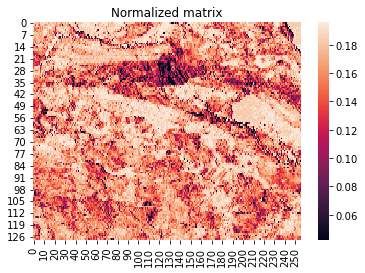

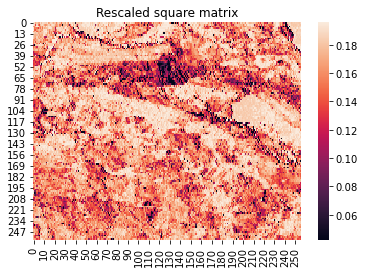

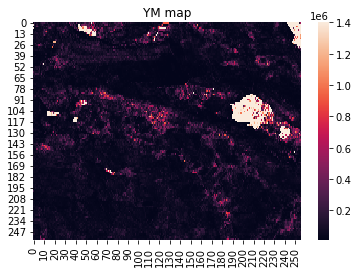

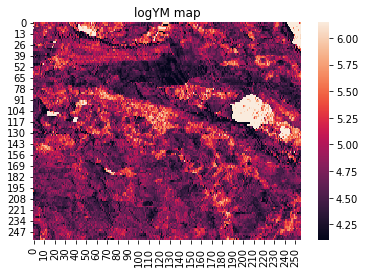

0 32 0 32


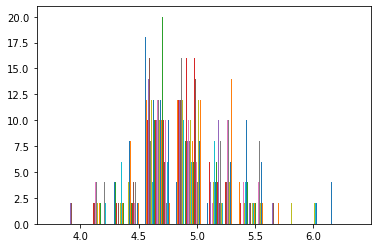

0 32 32 64


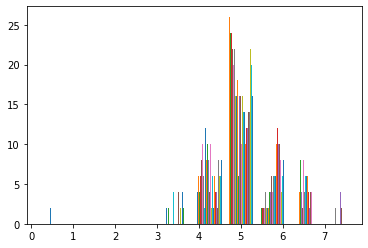

0 32 64 96


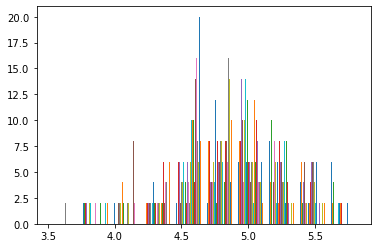

0 32 96 128


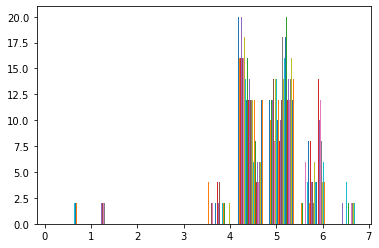

0 32 128 160


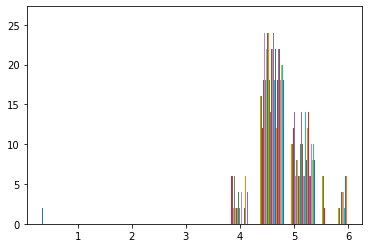

0 32 160 192


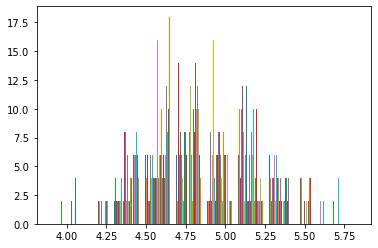

0 32 192 224


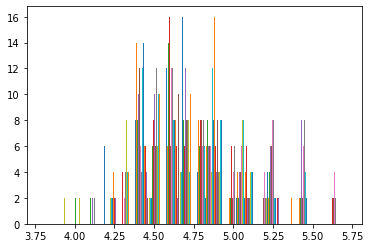

0 32 224 256


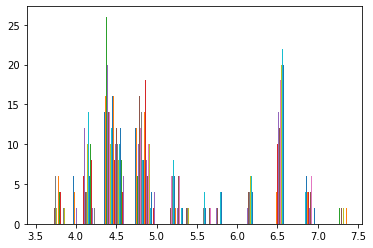

32 64 0 32


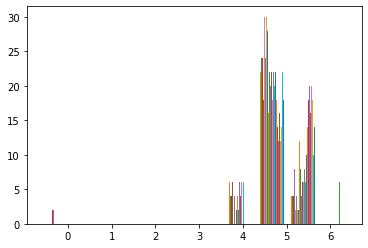

32 64 32 64


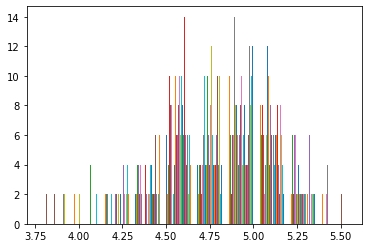

32 64 64 96


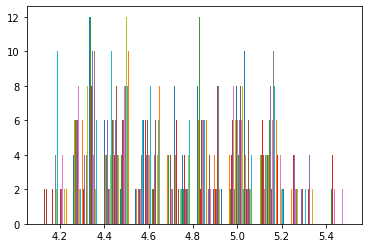

32 64 96 128


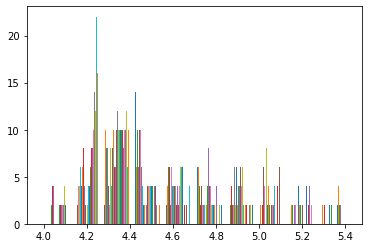

32 64 128 160


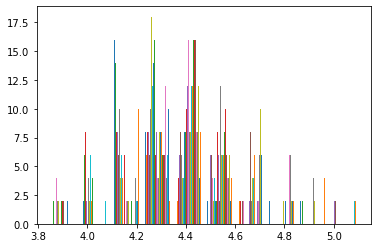

32 64 160 192


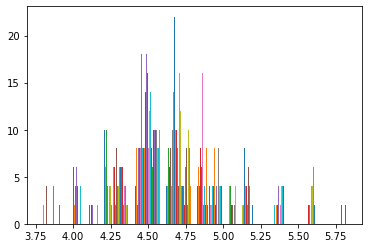

32 64 192 224


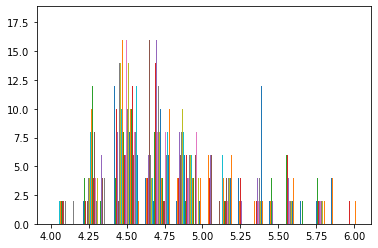

32 64 224 256


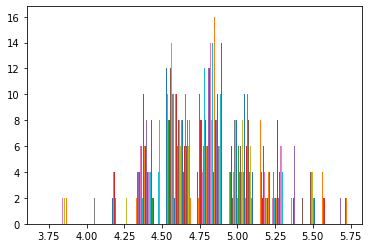

64 96 0 32


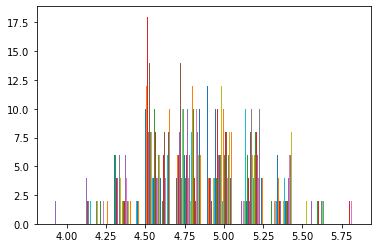

64 96 32 64


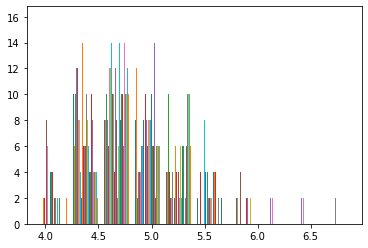

64 96 64 96


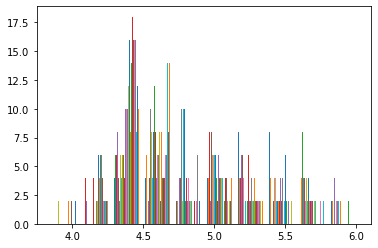

64 96 96 128


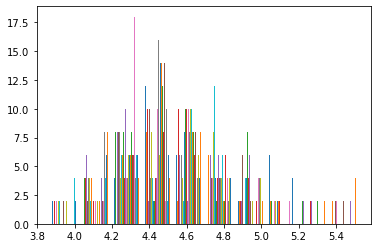

64 96 128 160


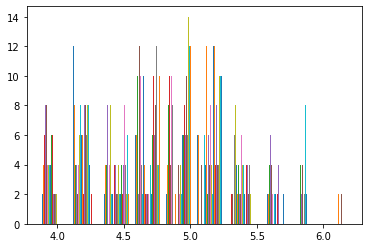

64 96 160 192


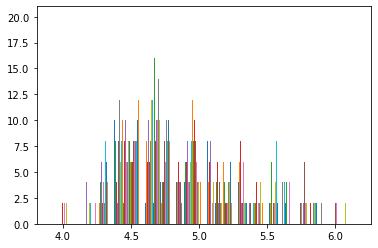

64 96 192 224


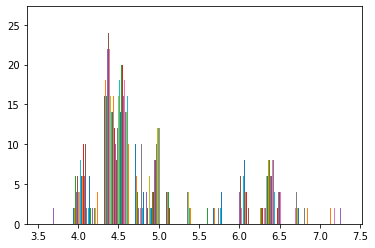

64 96 224 256


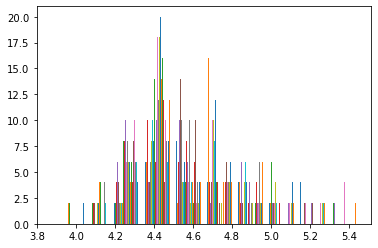

96 128 0 32


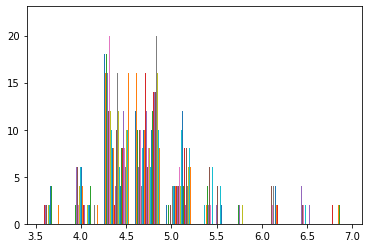

96 128 32 64


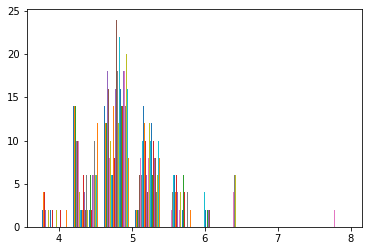

96 128 64 96


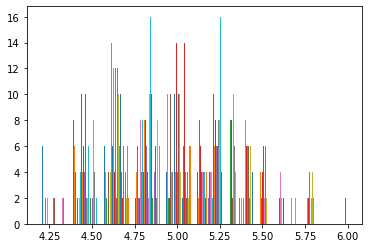

96 128 96 128


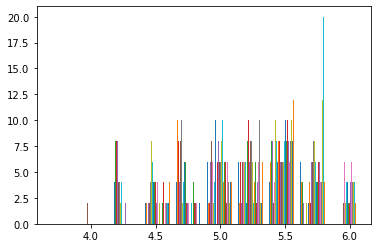

96 128 128 160


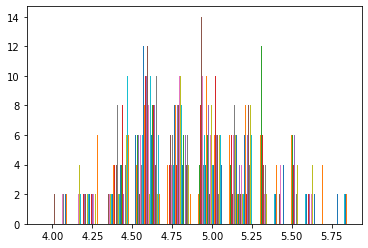

96 128 160 192


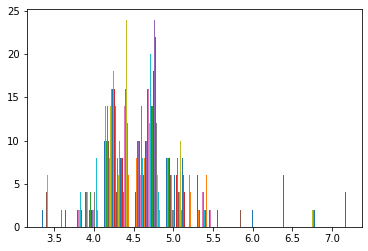

96 128 192 224


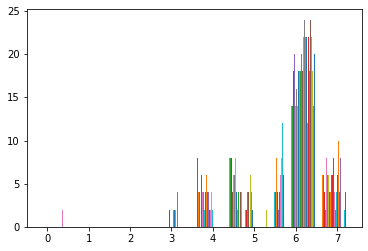

96 128 224 256


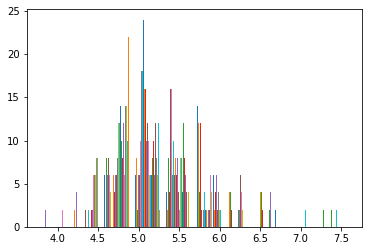

128 160 0 32


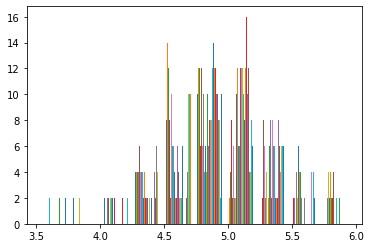

128 160 32 64


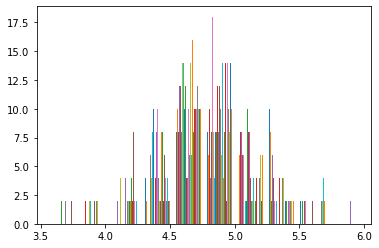

128 160 64 96


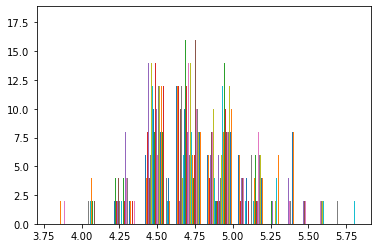

128 160 96 128


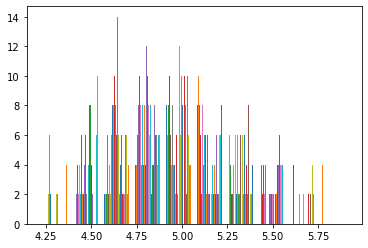

128 160 128 160


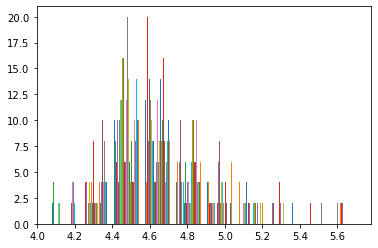

128 160 160 192


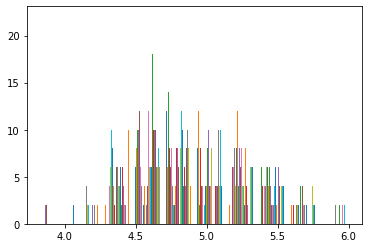

128 160 192 224


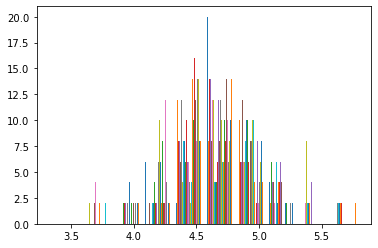

128 160 224 256


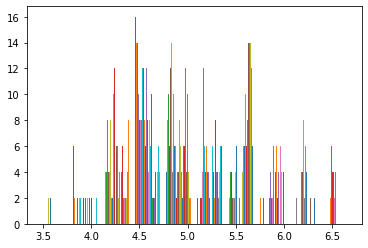

160 192 0 32


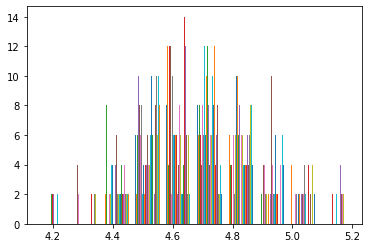

160 192 32 64


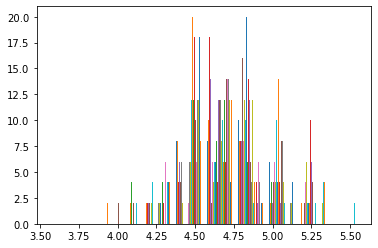

160 192 64 96


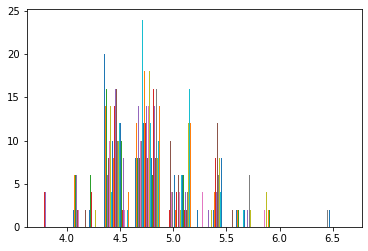

160 192 96 128


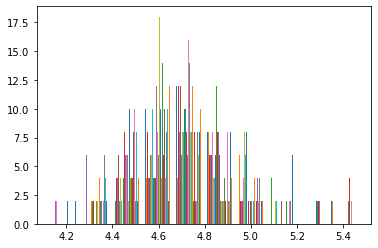

160 192 128 160


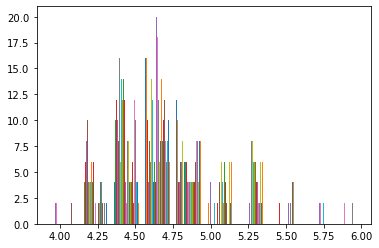

160 192 160 192


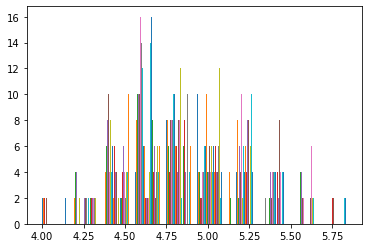

160 192 192 224


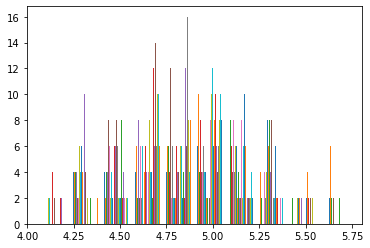

160 192 224 256


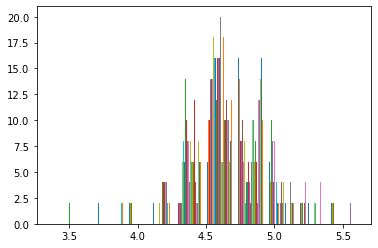

192 224 0 32


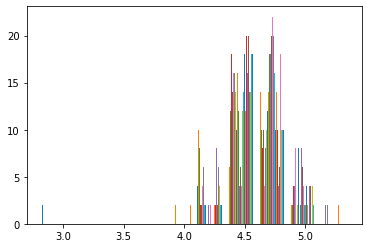

192 224 32 64


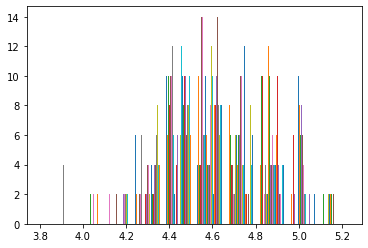

192 224 64 96


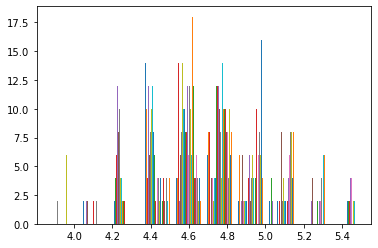

192 224 96 128


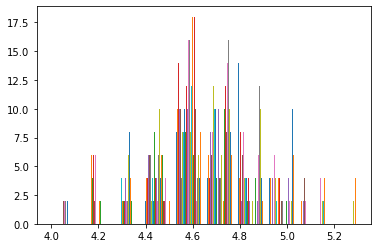

192 224 128 160


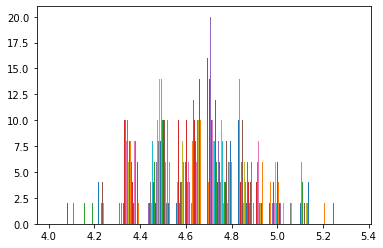

192 224 160 192


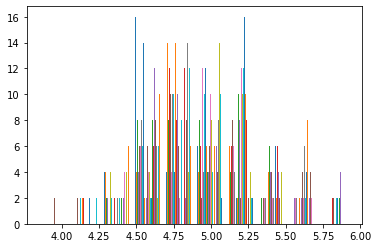

192 224 192 224


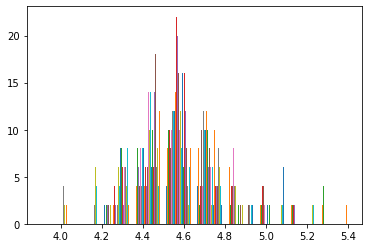

192 224 224 256


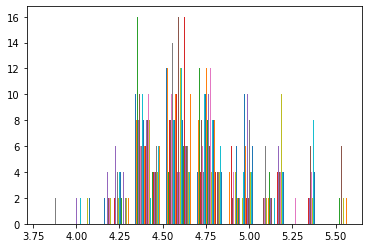

224 256 0 32


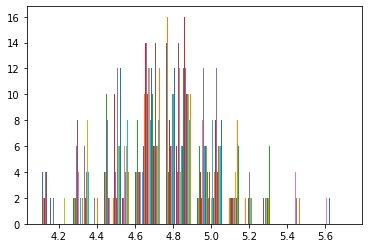

224 256 32 64


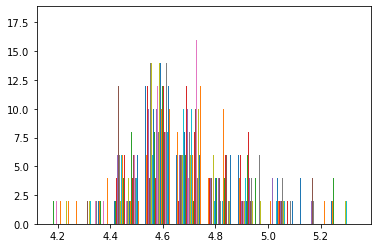

224 256 64 96


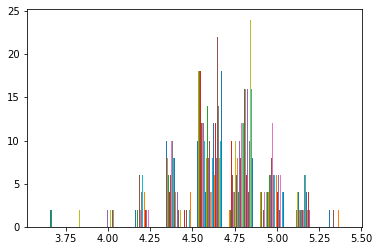

224 256 96 128


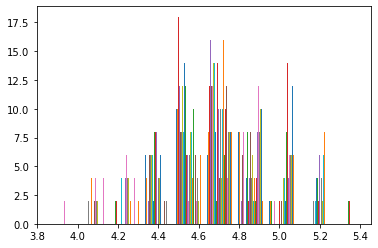

224 256 128 160


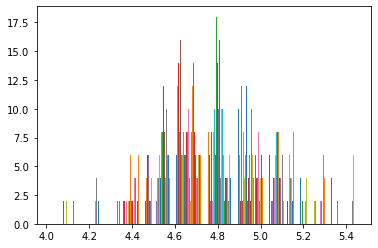

224 256 160 192


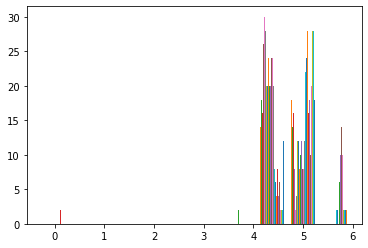

224 256 192 224


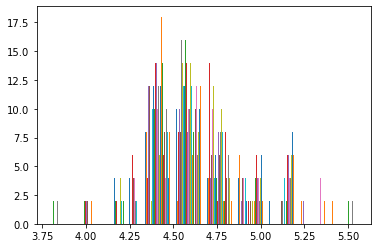

224 256 224 256


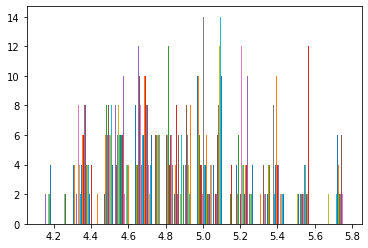

Ra (um): [[0.06888303528640749, 0.028081485757675172, 0.03064998362197876, 0.027119158346557624, 0.025557982577514654, 0.024173165756225586, 0.02301137685928345, 0.035088350727844234], [0.02658778431396484, 0.02108136257324219, 0.031599953374481196, 0.03893467225189209, 0.034298218045043946, 0.027679823969268803, 0.024501729114532467, 0.022390428478240965], [0.02152253969726562, 0.028764223760986328, 0.03492755714035034, 0.03486675606689453, 0.040273472449493405, 0.026150801022338868, 0.05438656814575195, 0.028673254809570316], [0.031836107339477546, 0.022341136193847665, 0.016111947811889647, 0.019468773654937745, 0.024563516993713383, 0.04234455238494873, 0.027578771179199213, 0.01351310126037597], [0.02123195186401367, 0.023117442420959478, 0.024914804275512695, 0.016896587212371826, 0.02393546089172363, 0.022094652246093745, 0.029895521383666992, 0.029676716011047367], [0.015573205321502685, 0.022859859859466557, 0.025142292581939694, 0.0187621524887085, 0.022755627722167972, 0.021

In [6]:
#Define size of window in ws
#for 256 pixel image, you can split by 64, 32, 16, 8
ws = 32


directoryPath = '/media/lentilha/TranscendCo/Constanca/afm/process QI for HAckaton'

directory = r'/media/lentilha/TranscendCo/Constanca/afm/process QI for HAckaton'
for strfile in os.scandir(directory):
  if (strfile.path.endswith(".tsv") or strfile.path.endswith(".docx")) and strfile.is_file():
    df = pd.read_table(strfile)

    xRange = df['X Position']
    yRange = df['Y Position']
    youngsModulus = df["Young's Modulus [Pa]"]
    height = df["Height [m]"]

    #fill NaN values with the next value
    height = height.fillna(method='ffill')
    youngsModulus = youngsModulus.fillna(method='ffill')
    
    logYoungsModulus = np.log10(youngsModulus)

    #scanning dimensions
    x = 256
    y = 128

    #split array corresponding to each row of the matrix
    arraysplit_h = np.split(height, y)
    #create matrix from split chunks
    matrix_h = np.asmatrix(arraysplit_h)
    #flip matrix to match scanning direction
    matrixfliped_h = np.flip(matrix_h,0)
    matrixfliped_h

    #find min discarding first 1% of data to exclude outliers
    #in my case i have this issue bcs i replace missing values with min values
    minMatrix = np.percentile(height, 1, interpolation = 'midpoint')

    #replace values below min with new min
    newMatrix_h = np.where((matrixfliped_h < minMatrix), minMatrix, matrixfliped_h)

    #normalize values to set min to 0
    newMatrix_h_norm = newMatrix_h + np.abs(minMatrix)

    #divide by um (microns)
    newMatrix_h_norm_um = newMatrix_h_norm/0.000001

    #look for upper limit for plotting and vis
    maxVis = (np.percentile(newMatrix_h_norm_um, 99, interpolation = 'midpoint'))

    #plot image to check (uncomment below as needed)
    #sns.heatmap(newMatrix_h_norm_um, vmin=0, vmax=maxVis, cmap=None)
    #the robust plots percentiles and not minmax
    sns.heatmap(newMatrix_h_norm_um, robust=True, cmap=None).set_title('Normalized matrix')
    plt.pause(0.05)
    plt.show()

    #create square matrix
    newMatrix_h_norm_um_resize = np.repeat(newMatrix_h_norm_um, repeats=2, axis=0)
    #plot new matrix to check
    sns.heatmap(newMatrix_h_norm_um_resize, robust=True, cmap=None).set_title('Rescaled square matrix')
    plt.pause(0.05)
    plt.show()

    #split array corresponding to each row of the matrix
    arraysplit_ym = np.split(youngsModulus, y)
    arraysplit_ym_log = np.split(logYoungsModulus, y)
    #create matrix from split chunks
    matrix_ym = np.asmatrix(arraysplit_ym)
    matrix_ym_log = np.asmatrix(arraysplit_ym_log)

    #flip matrix to match scanning direction
    matrixfliped_ym = np.flip(matrix_ym,0)
    matrixfliped_ym_log = np.flip(matrix_ym_log,0)

    #ATTENTION ATTENTION
    #COMMENT THESE 2 LINES OF CODE IF SCAN DIMENSIONS ARE SQUARED
    #copy each row to next in order to match the image dimensions of 256*256 pixels
    matrixresize_ym = np.repeat(matrixfliped_ym, repeats=2, axis=0)
    matrixresize_ym_log = np.repeat(matrixfliped_ym_log, repeats=2, axis=0)

    #plot color map to check 
    sns.heatmap(matrixresize_ym, robust=True, cmap=None).set_title('YM map')
    plt.pause(0.05)
    plt.show()
    sns.heatmap(matrixresize_ym_log, robust=True, cmap=None).set_title('logYM map')
    plt.pause(0.05)
    plt.show()

    
    stats = rollingWindowForStats(matrixresize_ym_log, ws)

    Ra, Rq = rollingWindowForRoughness(newMatrix_h_norm_um_resize, ws)
    print('Ra (um):', Ra)
    print('Rq (um):', Rq)

    # name of csv file  
    filename = "test.csv"
      
    # writing to csv file  
    with open(filename, 'a', newline='') as csvfile:  
    # creating a csv writer object  
      csvwriter = csv.writer(csvfile)  
          
    # writing the fields  
      csvwriter.writerows(stats)
      csvwriter.writerows(Ra)    
      csvwriter.writerows(Rq)    

  elif (strfile.path.endswith(".png") or strfile.path.endswith(".tif")) and strfile.is_file():
    print(strfile.path)
    
    img = cv2.imread(strfile.path, 0)
    plt.imshow(img, cmap='gray'), plt.title('original image')

    X = rollingWindowForLocalFft(img, ws)
    pcaX = hs.signals.Signal2D(X)
    pcaX.decomposition()
    pcaX.plot_explained_variance_ratio(n=30, xaxis_type='number') #plot PCA Scree Plot

    #output dimensions come from nr of components of the scree plot
    pcaX.decomposition(algorithm="nmf", output_dimension=6)
    pcaX.plot_decomposition_results()
    #elementsize = 32
    #elementsize*img.axes_manager[0].scale # if properly calibration read from image file
    loadingsS = pcaX.get_decomposition_loadings()
    hs.plot.plot_images(loadingsS,cmap='viridis', scalebar=None, axes_decor='off')
    factorsS =  pcaX.get_decomposition_factors()
    hs.plot.plot_images(factorsS,cmap='plasma', scalebar=None, axes_decor='off')